In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
df = pd.read_csv('machine.csv')

In [ ]:
import random
from IPython.core.pylabtools import figsize

N = df.shape[0]
d = df.shape[1]
ads_selected = [0]*d
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

figsize(10, 20)
beta = stats.beta
x = np.linspace(0.0,1.0,200)
def plot_sockets(L,M,n,k):
    
    colors = ["green","red","blue","cyan","magenta","yellow","white","black","orange","purple"]
    c_index = 0    
    
    for i in range(10):
        
        c = colors[c_index]
        y = beta( L[i]+1, M[i]+1 )
        p = plt.plot(x, y.pdf(x), lw=2, color=c, label = f'{L[i]}/{n[i]}')
        plt.fill_between(x, y.pdf(x), 0, color=c, alpha=0.2 )
        
        plt.autoscale(tight = "True")
        plt.title(f"{k+1} Trials")
        plt.legend()
        plt.autoscale(tight=True)
        c_index += 1

draw_samples = [1, 3, 25, 100,400, N]
draw = [0,1, 3, 25, 100,400, N]
for j,i in enumerate(draw_samples):
    plt.subplot(2, 3, j+1)         
    
    for k in range(draw[j],i):
        ad = 0
        max_random_beta = 0
        for f in range(d):
            random_beta = random.betavariate(number_of_rewards_1[f] + 1, number_of_rewards_0[f] + 1)
            if random_beta > max_random_beta:
                max_random_beta = random_beta
                ad = f
        ads_selected[ad] + =1
        reward = df.iloc[k, ad]
        if reward == 1:
            number_of_rewards_1[ad] += 1
        else:
            number_of_rewards_0[ad] += 1
        total_reward += reward

   
    
    plot_sockets(number_of_rewards_1,number_of_rewards_0,ads_selected,k)
    
    plt.autoscale(tight = True)
plt.tight_layout()
print(number_of_rewards_1)
print(number_of_rewards_0)
print(ads_selected)
print(sum(ads_selected))

Text(0, 0.5, 'Number of times each ad was selected by the algorithm')

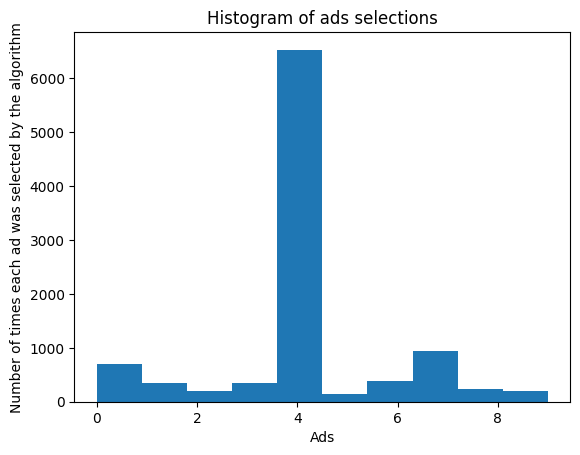

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected by the algorithm')